In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
os.chdir('/Users/xiaodanxu/Library/CloudStorage/GoogleDrive-arielinseu@gmail.com/My Drive/GEMS/typology/V2')

In [2]:
cluster_results = read_csv('Output/clustering_outputs_with_raw_data.csv')
print(cluster_results.columns)
cluster_results.head(5)

Index(['GEOID', 'ALAND', 'pct_water', 'land_area_acre', 'populationE',
       'householdsE', 'pop_per_acre', 'total_jobs', 'jobs_per_acre',
       'jobs_resident_bal', 'job_diversity', 'jobs_dist_bin1',
       'jobs_dist_bin2', 'jobs_dist_bin3', 'jobs_dist_bin4', 'remote jobs',
       'job_sink_mag', 'impervious_developed', 'developed_open_space',
       'census_urban_area', 'tract', 'demand_microtype_comb'],
      dtype='object')


,GEOID,ALAND,pct_water,land_area_acre,populationE,householdsE,pop_per_acre,total_jobs,jobs_per_acre,jobs_resident_bal,...,jobs_dist_bin2,jobs_dist_bin3,jobs_dist_bin4,remote jobs,job_sink_mag,impervious_developed,developed_open_space,census_urban_area,tract,demand_microtype_comb
0,1045020801,19261326,0.000000,4759.569961,3317,1213,0.696912,57,0.011976,0.017184,...,0.052632,0.298246,0.473684,0.017544,0.051259,0.144737,0.105263,1,1045020801,Urban_1
1,1017954200,62998696,0.000550,15567.292775,3800,1280,0.244102,368,0.023639,0.096842,...,0.070652,0.366848,0.532609,0.029891,0.245497,0.021661,0.054152,1,1017954200,Urban_1
2,1017953800,515692207,0.021845,127430.122811,3715,1512,0.029153,95,0.000746,0.025572,...,0.000000,0.315789,0.684211,0.000000,0.073586,0.008019,0.032547,0,1017953800,Rural_1
3,1017954300,132642536,0.001342,32776.633858,5275,2081,0.160938,3085,0.094122,0.584834,...,0.091410,0.254133,0.612966,0.041491,1.457940,0.063830,0.048356,1,1017954300,Urban_2
4,1017954700,38036820,0.006903,9399.088406,4586,1706,0.487920,1345,0.143099,0.293284,...,0.000000,0.237918,0.614126,0.076580,0.680668,0.073620,0.061350,1,1017954700,Urban_2


In [3]:
cluster_results = cluster_results.set_index('GEOID')
list_of_var = ['pop_per_acre', 'jobs_per_acre',
       'jobs_resident_bal', 'job_diversity', 'jobs_dist_bin1',
       'jobs_dist_bin2', 'jobs_dist_bin3', 'jobs_dist_bin4', 'remote jobs',
       'job_sink_mag', 'impervious_developed', 'developed_open_space',
       'census_urban_area', 'demand_microtype_comb']
cluster_results_to_plot = cluster_results[list_of_var]
cluster_results_to_plot.head(5)

,pop_per_acre,jobs_per_acre,jobs_resident_bal,job_diversity,jobs_dist_bin1,jobs_dist_bin2,jobs_dist_bin3,jobs_dist_bin4,remote jobs,job_sink_mag,impervious_developed,developed_open_space,census_urban_area,demand_microtype_comb
GEOID,,,,,,,,,,,,,,
1045020801,0.696912,0.011976,0.017184,0.609488,0.157895,0.052632,0.298246,0.473684,0.017544,0.051259,0.144737,0.105263,1,Urban_1
1017954200,0.244102,0.023639,0.096842,0.514647,0.000000,0.070652,0.366848,0.532609,0.029891,0.245497,0.021661,0.054152,1,Urban_1
1017953800,0.029153,0.000746,0.025572,0.534946,0.000000,0.000000,0.315789,0.684211,0.000000,0.073586,0.008019,0.032547,0,Rural_1
1017954300,0.160938,0.094122,0.584834,0.630540,0.000000,0.091410,0.254133,0.612966,0.041491,1.457940,0.063830,0.048356,1,Urban_2
1017954700,0.487920,0.143099,0.293284,0.801565,0.071375,0.000000,0.237918,0.614126,0.076580,0.680668,0.073620,0.061350,1,Urban_2


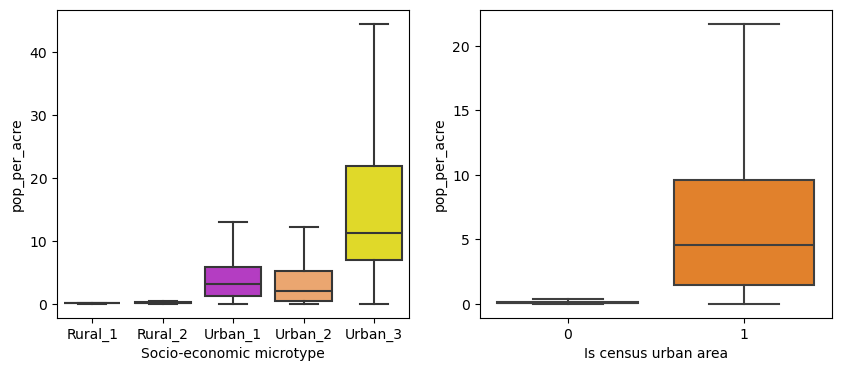

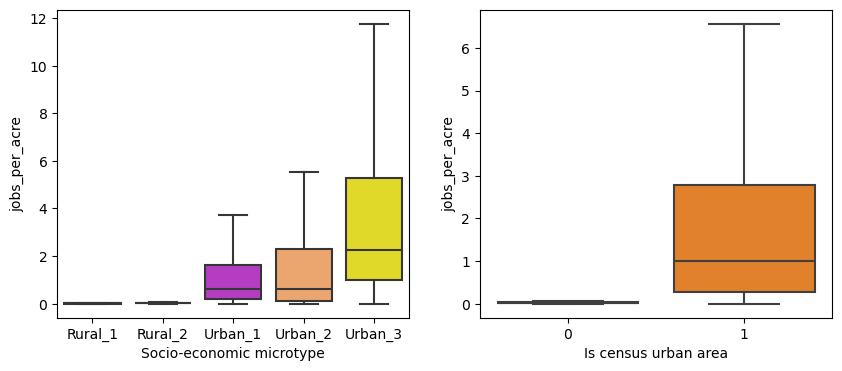

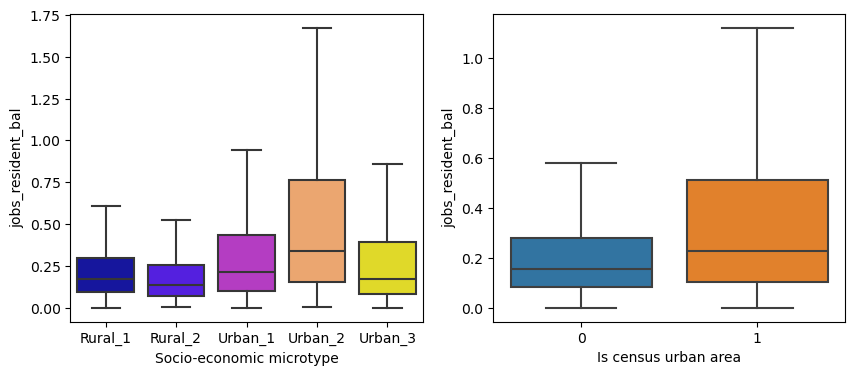

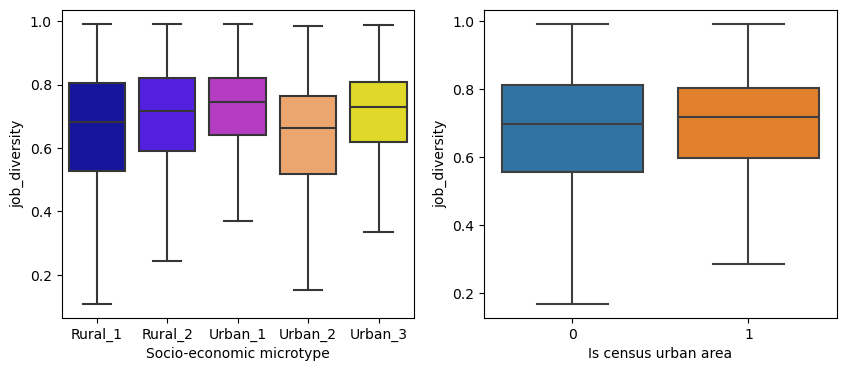

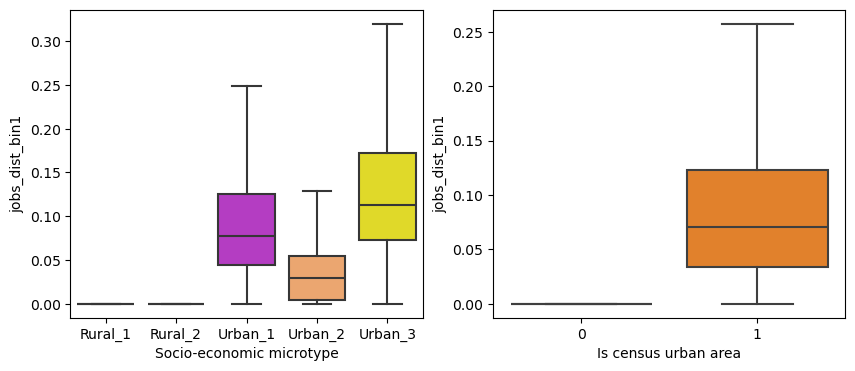

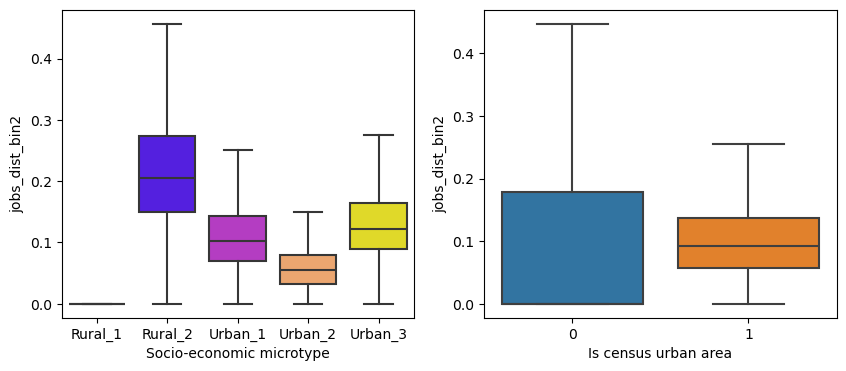

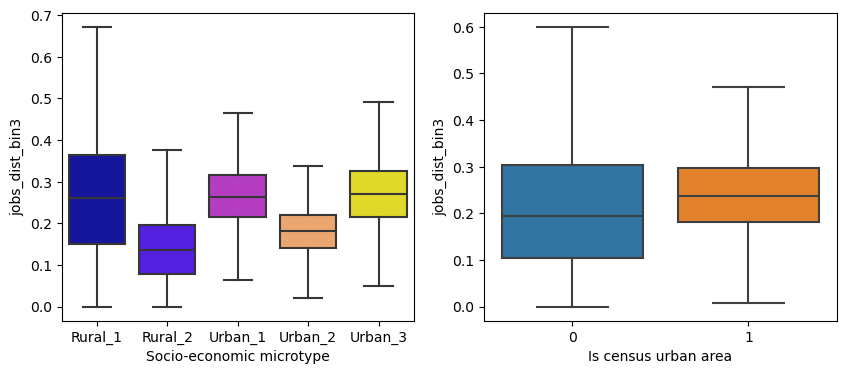

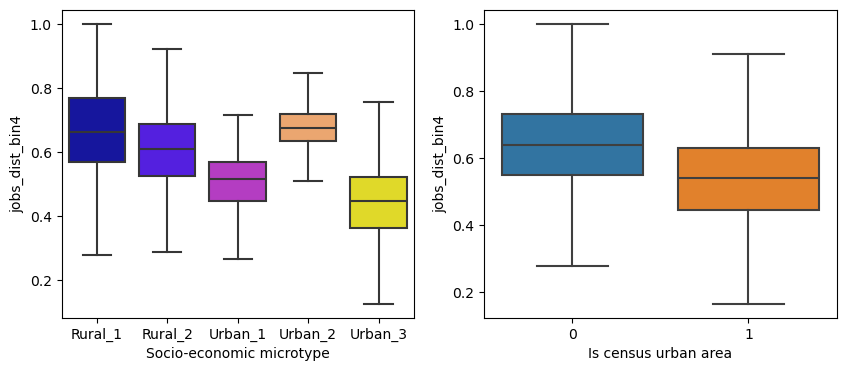

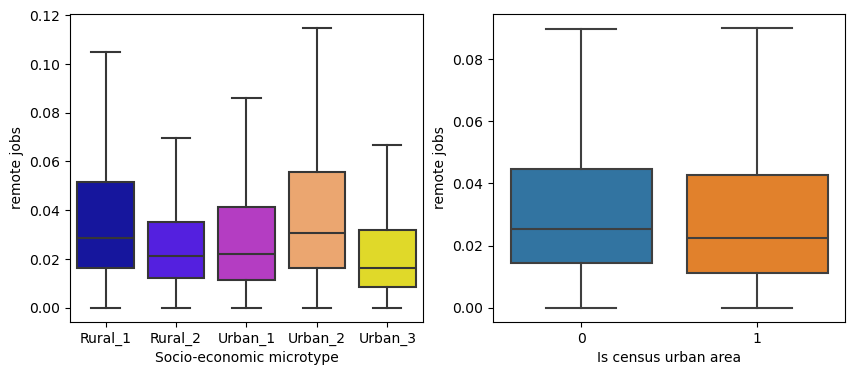

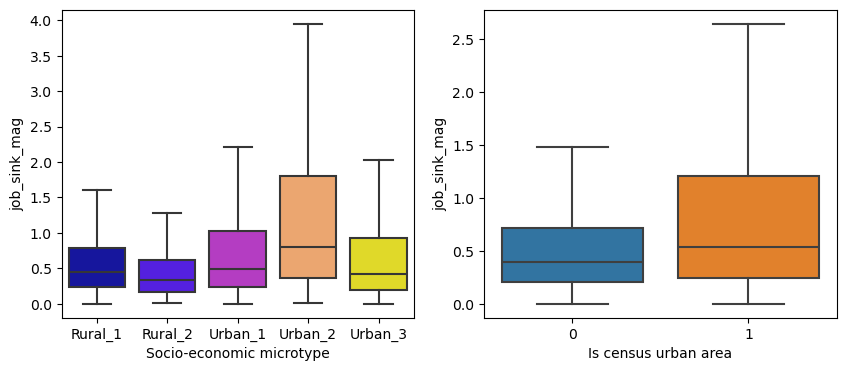

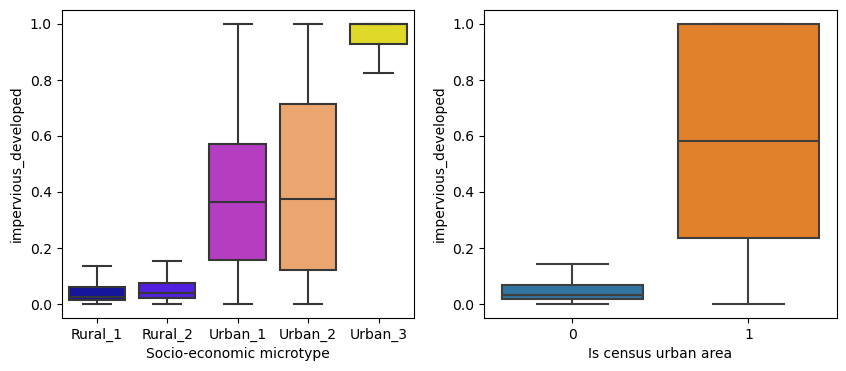

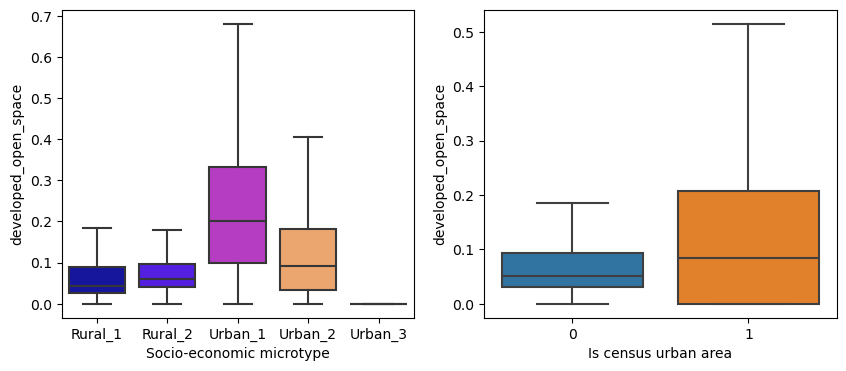

In [5]:
list_of_feature = ['pop_per_acre', 'jobs_per_acre',
       'jobs_resident_bal', 'job_diversity', 'jobs_dist_bin1',
       'jobs_dist_bin2', 'jobs_dist_bin3', 'jobs_dist_bin4', 'remote jobs',
       'job_sink_mag', 'impervious_developed', 'developed_open_space']
palette = ["#0000B3FF", "#4500FFFF", "#C527D8FF", "#FFA35CFF", "#FFF50AFF"]
cluster_results_to_plot = cluster_results_to_plot.sort_values(by = 'demand_microtype_comb')
for feature in list_of_feature:
    plt.figure(figsize = (10, 4))
    plt.subplot(121)
    sns.boxplot(data = cluster_results_to_plot, x = "demand_microtype_comb", 
                y = feature, 
                palette=sns.color_palette(palette, 5),
                showfliers=False)
    plt.xlabel('Socio-economic microtype')

    plt.subplot(122)
    sns.boxplot(data = cluster_results_to_plot, x = "census_urban_area", 
                y = feature, showfliers=False)
    plt.xlabel('Is census urban area')
    plt.savefig('Plot/box_plot_for_' + feature + '.png', dpi = 300)
    plt.show()